In [97]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import h5py
from ipynb.fs.full.dataset import load_dataset

In [98]:
# Set figure size
plt.rcParams["figure.figsize"]=(20,3)

In [99]:
# Load dataset
X_train_orig, y_train, X_test_orig, y_test = load_dataset()

In [100]:
# Explore dataset
print("X_train: ", X_train_orig.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test_orig.shape)
print("y_test: ", y_test.shape)

X_train:  (19956, 64, 64, 3)
y_train:  (1, 19956)
X_test:  (4990, 64, 64, 3)
y_test:  (1, 4990)


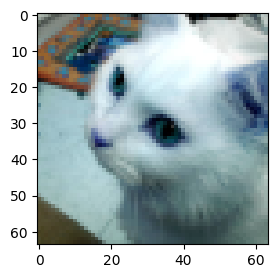

In [128]:
# Example of a picture
index = 4
plt.imshow(X_train_orig[index])

In [102]:
# Reshape the training and test examples 
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.

print ("X_train's shape: " + str(X_train.shape))
print ("X_test's shape: " + str(X_test.shape))

X_train's shape: (12288, 19956)
X_test's shape: (12288, 4990)


In [103]:
from neural_network import MNNClassifier

In [116]:
model= MNNClassifier(random_state=13, layer_dims=[12288, 400, 120, 30, 8, 1], learning_rate=0.01, num_iterations=8000)

In [117]:
parameters, cost = model.fit(X_train, y_train)

Cost after iteration 0: 0.6932336044246674
Cost after iteration 100: 0.6854796937306472
Cost after iteration 200: 0.6799896218284138
Cost after iteration 300: 0.6740664937788898
Cost after iteration 400: 0.6674415696098767
Cost after iteration 500: 0.6603711885902933
Cost after iteration 600: 0.6532389866797481
Cost after iteration 700: 0.6463782655847049
Cost after iteration 800: 0.6496754977912339
Cost after iteration 900: 0.647355720349685
Cost after iteration 1000: 0.6445399160259997
Cost after iteration 1100: 0.6412981569286431
Cost after iteration 1200: 0.6389285894175781
Cost after iteration 1300: 0.6366230783451831
Cost after iteration 1400: 0.6338274046825024
Cost after iteration 1500: 0.631169845121889
Cost after iteration 1600: 0.6284599512210177
Cost after iteration 1700: 0.6261666072086288
Cost after iteration 1800: 0.6237402211728248
Cost after iteration 1900: 0.6212083316454249
Cost after iteration 2000: 0.6187274492084297
Cost after iteration 2100: 0.6162126197949843
Co

In [118]:
predicted = model.predict(X_test, y_test)

Accuracy: 0.6308617234468938


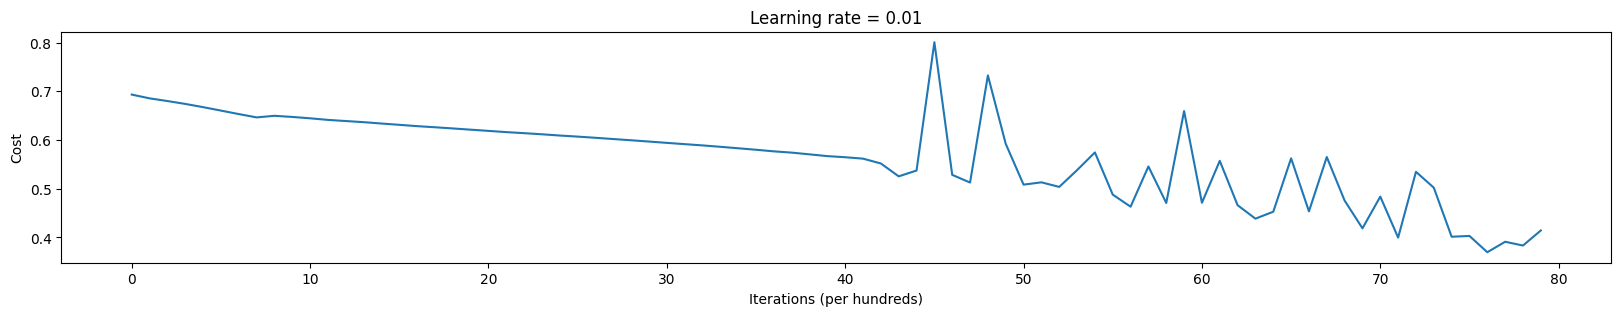

In [120]:
plt.plot(np.squeeze(cost))
plt.ylabel('Cost')
plt.xlabel('Iterations (per hundreds)')
plt.title("Learning rate = 0.01")
plt.show()